## 불균형 데이터와 결측치를 고려한 이진 분류 예측: 지도 학습 모델
- **Problem**

Train과 test 데이터를 활용하여 변수 'target'을 효과적으로 예측하기 위한 탐색적 데이터 분석(EDA) 및 데이터 정제, 모델링 작업 수행

- **Process**
1. 데이터셋 확인
2. EDA
3. Visualize Target 0 VS 1
4. Feature Engeeniring
5. Data Cleansing
6. Modeling
7. Prediction

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Import Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
random_state = 42
scoring_metric = 'recall'
comparison_dict, comparison_test_dict = {}, {}

In [5]:
# Comparison Matrix 구축
comparison_matrix = {}
for key, value in comparison_dict.items():
    comparison_matrix[str(key)] = value[0:4]

comparison_df = pd.DataFrame(comparison_matrix,
                             index=['Accuracy', 'Precision', 'Recall', 'AUC']).T
comparison_df.style.highlight_max(color='indianred', axis=0)

### 1. 데이터셋 확인
- Unnamed: 0 : int64, 연속형
- KEY_ID : int64, 연속형
- YEAR : int64, 범주형
- MONTH : object, 범주형
- DAY : int64, 범주형
- ID_1 : int64, 범주형
- ID_2 : object, 범주형
- ID_3 : object, 범주형
- VAR_7~11 : int64, 범주형
- VAR_12~22 : object, 범주형
- VAR_23 : int64, 범주형
- VAR_24 : object, 범주형
- VAR_25 : float64, 연속형
- VAR_26 : int64, 범주형
- VAR_27~32 : float64, 연속형
- VAR_33 : int64, 범주형
- VAR_34~53 : float64, 연속형
- VAR_54 : int64, 범주형
- target : float64, 범주형


In [6]:
# 데이터 가져오기
train = pd.read_csv('/content/gdrive/My Drive/data/train.csv')
test = pd.read_csv('/content/gdrive/My Drive/data/test.csv')

train.head()

Unnamed: 0        KEY_ID  YEAR MONTH  DAY     ID_1          ID_2 ID_3  \
0           0  532477000030  2021    11   25  5324770  5QUE126600R1   1B   
1           1  532477000029  2021    11   25  5324770  5QUE126600R1   1B   
2           2  532477000028  2021    11   25  5324770  5QUE126600R1   1B   
3           3  532477000009  2021    11   25  5324770  5QUE126600R1   1B   
4           4  532477000006  2021    11   25  5324770  5QUE126600R1   1B   

   VAR_7  VAR_8  ...  VAR_46  VAR_47  VAR_48 VAR_49  VAR_50 VAR_51 VAR_52  \
0      1      2  ...   645.0   215.0  1150.0  230.0  1225.0  245.0  275.2   
1      1      2  ...   644.7   214.9  1150.0  230.0  1225.5  245.0  275.2   
2      1      2  ...   644.7   215.1  1150.0  230.0  1225.0  245.0  274.9   
3      1      2  ...   644.7   215.0  1150.0  230.1  1225.0  245.0  275.0   
4      1      2  ...   644.7   214.9  1150.5  230.0  1225.0  245.0  275.0   

   VAR_53 VAR_54 target  
0  1100.4     70    0.0  
1  1100.0     70    0.0  
2  1099.6     70    0.0  
3  1100.0     70    0.0  
4  1099.6     70    0.0  

[5 rows x 57 columns]

In [ ]:
# 데이터 차원 확인
print("train :",train.shape)
print("test :",test.shape)

train : (1180, 57)
test : (1180, 58)


### 2. EDA

In [ ]:
# 데이터 column 확인
train.columns

Index(['Unnamed: 0', 'KEY_ID', 'YEAR', 'MONTH', 'DAY', 'ID_1', 'ID_2', 'ID_3',
       'VAR_7', 'VAR_8', 'VAR_9', 'VAR_10', 'VAR_11', 'VAR_12', 'VAR_13',
       'VAR_14', 'VAR_15', 'VAR_16', 'VAR_17', 'VAR_18', 'VAR_19', 'VAR_20',
       'VAR_21', 'VAR_22', 'VAR_23', 'VAR_24', 'VAR_25', 'VAR_26', 'VAR_27',
       'VAR_28', 'VAR_29', 'VAR_30', 'VAR_31', 'VAR_32', 'VAR_33', 'VAR_34',
       'VAR_35', 'VAR_36', 'VAR_37', 'VAR_38', 'VAR_39', 'VAR_40', 'VAR_41',
       'VAR_42', 'VAR_43', 'VAR_44', 'VAR_45', 'VAR_46', 'VAR_47', 'VAR_48',
       'VAR_49', 'VAR_50', 'VAR_51', 'VAR_52', 'VAR_53', 'VAR_54', 'target'],
      dtype='object')

In [ ]:
test.columns

Index(['Unnamed: 0', 'KEY_ID', 'YEAR', 'MONTH', 'DAY', 'ID_1', 'ID_2', 'ID_3',
       'VAR_7', 'VAR_8', 'VAR_9', 'VAR_10', 'VAR_11', 'VAR_12', 'VAR_13',
       'VAR_14', 'VAR_15', 'VAR_16', 'VAR_17', 'VAR_18', 'VAR_19', 'VAR_20',
       'VAR_21', 'VAR_22', 'VAR_23', 'VAR_24', 'VAR_25', 'VAR_26', 'VAR_27',
       'VAR_28', 'VAR_29', 'VAR_30', 'VAR_31', 'VAR_32', 'VAR_33', 'VAR_34',
       'VAR_35', 'VAR_36', 'VAR_37', 'VAR_38', 'VAR_39', 'VAR_40', 'VAR_41',
       'VAR_42', 'VAR_43', 'VAR_44', 'VAR_45', 'VAR_46', 'VAR_47', 'VAR_48',
       'VAR_49', 'VAR_50', 'VAR_51', 'VAR_52', 'VAR_53', 'VAR_54', 'VAR_55',
       'target'],
      dtype='object')

In [ ]:
# 데이터 타입 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1170 entries, 0 to 1179
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   KEY_ID          1170 non-null   int64  
 1   YEAR            1170 non-null   int64  
 2   MONTH           1170 non-null   int64  
 3   DAY             1170 non-null   int64  
 4   ID_1            1170 non-null   int64  
 5   ID_3            1170 non-null   int64  
 6   VAR_7           1170 non-null   int64  
 7   VAR_8           1170 non-null   int64  
 8   VAR_9           1170 non-null   int64  
 9   VAR_10          1170 non-null   int64  
 10  VAR_11          1170 non-null   int64  
 11  VAR_12          576 non-null    float64
 12  VAR_13          576 non-null    float64
 13  VAR_16          576 non-null    float64
 14  VAR_23          1170 non-null   int64  
 15  VAR_24          1170 non-null   int64  
 16  VAR_25          1170 non-null   float64
 17  VAR_26          1170 non-null   i

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 58 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1180 non-null   int64  
 1   KEY_ID      1180 non-null   int64  
 2   YEAR        1180 non-null   int64  
 3   MONTH       1180 non-null   object 
 4   DAY         1180 non-null   int64  
 5   ID_1        1180 non-null   int64  
 6   ID_2        1180 non-null   object 
 7   ID_3        1180 non-null   object 
 8   VAR_7       1180 non-null   int64  
 9   VAR_8       1180 non-null   int64  
 10  VAR_9       1180 non-null   int64  
 11  VAR_10      1180 non-null   int64  
 12  VAR_11      1180 non-null   int64  
 13  VAR_12      1180 non-null   object 
 14  VAR_13      1180 non-null   object 
 15  VAR_14      1180 non-null   object 
 16  VAR_15      1180 non-null   object 
 17  VAR_16      1180 non-null   object 
 18  VAR_17      1180 non-null   object 
 19  VAR_18      1180 non-null  

In [ ]:
# 데이터 통계 요약
train.describe(include='all').T

count unique              top  freq                 mean  \
Unnamed: 0  1180.0    NaN              NaN   NaN                589.5   
KEY_ID      1180.0    NaN              NaN   NaN  533838613642.583069   
YEAR        1180.0    NaN              NaN   NaN               2021.0   
MONTH         1180      4               12  1110                  NaN   
DAY         1180.0    NaN              NaN   NaN            12.191525   
ID_1        1180.0    NaN              NaN   NaN       5338386.131356   
ID_2          1180     10  6QUEM1590061600   347                  NaN   
ID_3          1180      2               1S   751                  NaN   
VAR_7       1180.0    NaN              NaN   NaN             2.980508   
VAR_8       1180.0    NaN              NaN   NaN                  2.0   
VAR_9       1180.0    NaN              NaN   NaN                  3.0   
VAR_10      1180.0    NaN              NaN   NaN                  7.0   
VAR_11      1180.0    NaN              NaN   NaN           8305.44322   
VAR_12        1180      3                    599                  NaN   
VAR_13        1180      3                    599                  NaN   
VAR_14        1180      1                   1180                  NaN   
VAR_15        1180      1                   1180                  NaN   
VAR_16        1180      2                    599                  NaN   
VAR_17        1180      1                   1180                  NaN   
VAR_18        1180      2                3  1170                  NaN   
VAR_19        1180      1                   1180                  NaN   
VAR_20        1180      2                5  1170                  NaN   
VAR_21        1180      2               30  1170                  NaN   
VAR_22        1180      1                   1180                  NaN   
VAR_23      1180.0    NaN              NaN   NaN                  1.0   
VAR_24        1180      1                G  1180                  NaN   
VAR_25      1180.0    NaN              NaN   NaN            31.252042   
VAR_26      1180.0    NaN              NaN   NaN           143.338983   
VAR_27      1180.0    NaN              NaN   NaN            14.722419   
VAR_28      1180.0    NaN              NaN   NaN           376.059418   
VAR_29      1180.0    NaN              NaN   NaN           338.875619   
VAR_30      1180.0    NaN              NaN   NaN           315.269625   
VAR_31      1180.0    NaN              NaN   NaN             0.037171   
VAR_32      1180.0    NaN              NaN   NaN            -0.001864   
VAR_33      1180.0    NaN              NaN   NaN                  1.0   
VAR_34      1180.0    NaN              NaN   NaN           626.406441   
VAR_35       751.0    NaN              NaN   NaN           775.953395   
VAR_36      1180.0    NaN              NaN   NaN           825.350847   
VAR_37      1180.0    NaN              NaN   NaN           825.357627   
VAR_38       429.0    NaN              NaN   NaN           708.095105   
VAR_39      1180.0    NaN              NaN   NaN           178.925932   
VAR_40      1180.0    NaN              NaN   NaN           755.466102   
VAR_41      1180.0    NaN              NaN   NaN           188.862119   
VAR_42       751.0    NaN              NaN   NaN           799.448202   
VAR_43      1180.0    NaN              NaN   NaN              994.175   
VAR_44      1180.0    NaN              NaN   NaN          1024.565678   
VAR_45      1180.0    NaN              NaN   NaN          1024.552542   
VAR_46      1180.0    NaN              NaN   NaN           644.917373   
VAR_47      1180.0    NaN              NaN   NaN           214.974322   
VAR_48      1180.0    NaN              NaN   NaN          1149.979661   
VAR_49       429.0    NaN              NaN   NaN           229.986713   
VAR_50      1180.0    NaN              NaN   NaN          1256.418644   
VAR_51      1180.0    NaN              NaN   NaN           251.281186   
VAR_52      1180.0    NaN              NaN   NaN           273.842797  

In [ ]:
# 결측치 확인
train.isna().sum()

KEY_ID              0
YEAR                0
MONTH               0
DAY                 0
ID_1                0
ID_3                0
VAR_7               0
VAR_8               0
VAR_9               0
VAR_10              0
VAR_11              0
VAR_12            594
VAR_13            594
VAR_16            594
VAR_23              0
VAR_24              0
VAR_25              0
VAR_26              0
VAR_27              0
VAR_28              0
VAR_29              0
VAR_30              0
VAR_31              0
VAR_32              0
VAR_33              0
VAR_34              0
VAR_35            425
VAR_36              0
VAR_37              0
VAR_38            745
VAR_39              0
VAR_40              0
VAR_41              0
VAR_42            425
VAR_43              0
VAR_44              0
VAR_45              0
VAR_46              0
VAR_47              0
VAR_48              0
VAR_49            745
VAR_50              0
VAR_51              0
VAR_52              0
VAR_53              0
VAR_54    

In [ ]:
test.isna().sum()

Unnamed: 0      0
KEY_ID          0
YEAR            0
MONTH           0
DAY             0
ID_1            0
ID_2            0
ID_3            0
VAR_7           0
VAR_8           0
VAR_9           0
VAR_10          0
VAR_11          0
VAR_12          0
VAR_13          0
VAR_14          0
VAR_15          0
VAR_16          0
VAR_17          0
VAR_18          0
VAR_19          0
VAR_20          0
VAR_21          0
VAR_22          0
VAR_23          0
VAR_24          0
VAR_25          0
VAR_26          0
VAR_27          0
VAR_28          0
VAR_29          0
VAR_30          0
VAR_31          0
VAR_32          0
VAR_33          0
VAR_34          0
VAR_35        428
VAR_36          0
VAR_37          0
VAR_38        752
VAR_39          0
VAR_40          0
VAR_41          0
VAR_42        428
VAR_43          0
VAR_44          0
VAR_45          0
VAR_46          0
VAR_47          0
VAR_48          0
VAR_49        752
VAR_50          0
VAR_51          0
VAR_52          0
VAR_53          0
VAR_54    

In [ ]:
# 중복 확인
train.nunique()

Unnamed: 0    1180
KEY_ID        1180
YEAR             1
MONTH            4
DAY             20
ID_1            29
ID_2            10
ID_3             2
VAR_7            3
VAR_8            1
VAR_9            1
VAR_10           1
VAR_11           8
VAR_12           3
VAR_13           3
VAR_14           1
VAR_15           1
VAR_16           2
VAR_17           1
VAR_18           2
VAR_19           1
VAR_20           2
VAR_21           2
VAR_22           1
VAR_23           1
VAR_24           1
VAR_25         142
VAR_26           2
VAR_27        1159
VAR_28        1179
VAR_29        1176
VAR_30        1173
VAR_31         251
VAR_32         331
VAR_33           1
VAR_34          14
VAR_35           9
VAR_36           8
VAR_37           7
VAR_38           6
VAR_39           8
VAR_40          11
VAR_41          10
VAR_42           7
VAR_43          10
VAR_44           5
VAR_45           5
VAR_46           6
VAR_47           7
VAR_48           5
VAR_49           5
VAR_50          10
VAR_51      

0.0    976
1.0    194
Name: target, dtype: int64


Text(0, 0.5, 'Count')

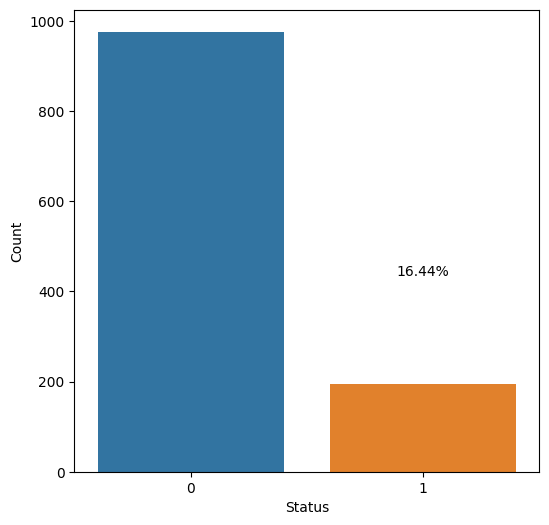

In [ ]:
# Target label별 개수 확인 - All
print(train['target'].value_counts())

fig, ax = plt.subplots(figsize=(6, 6))

sns.countplot(x='target', data=train, ax=ax)

for index, value in enumerate(train['target'].value_counts()):
    label = '{}%'.format(round((value / train['target'].shape[0]) * 100, 2))
    ax.annotate(label,
                xy=(index, value + 250),
                ha='center',
                va='center')

ax.set_xticklabels(['0','1'])
ax.set_xlabel('Status')
ax.set_ylabel('Count')

Unnamed: 0
Skew : 0.0
Kurt : -1.2


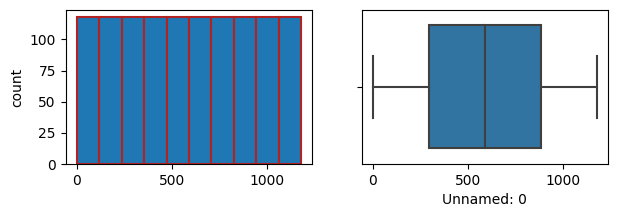

KEY_ID
Skew : 0.61
Kurt : -0.48


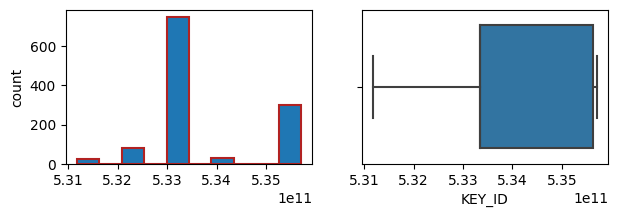

YEAR
Skew : 0
Kurt : 0


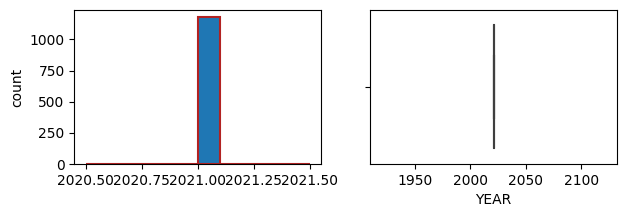

DAY
Skew : 0.24
Kurt : 0.4


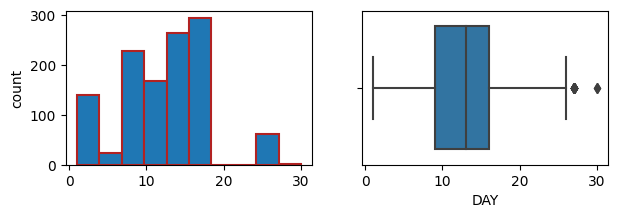

ID_1
Skew : 0.61
Kurt : -0.48


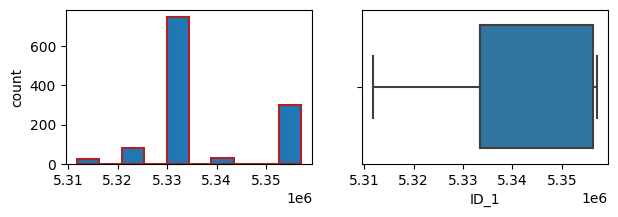

VAR_7
Skew : 2.02
Kurt : 15.62


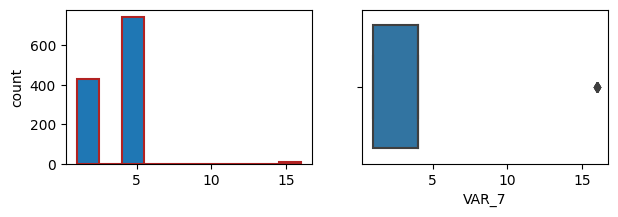

VAR_8
Skew : 0
Kurt : 0


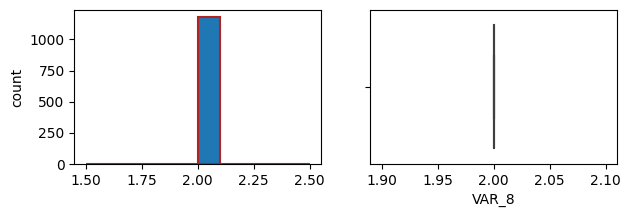

VAR_9
Skew : 0
Kurt : 0


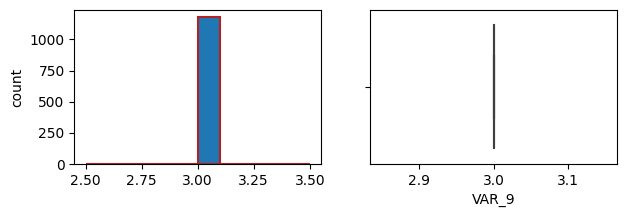

VAR_10
Skew : 0
Kurt : 0


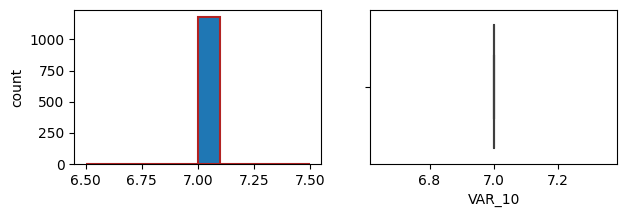

VAR_11
Skew : -2.46
Kurt : 8.42


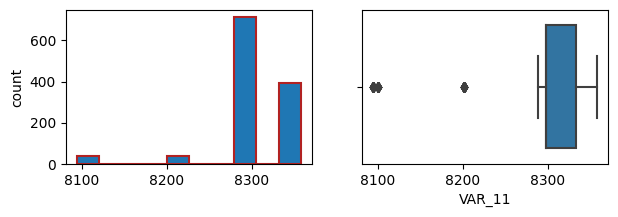

VAR_23
Skew : 0
Kurt : 0


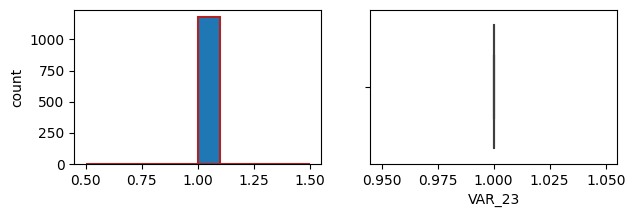

VAR_25
Skew : 11.47
Kurt : 278.62


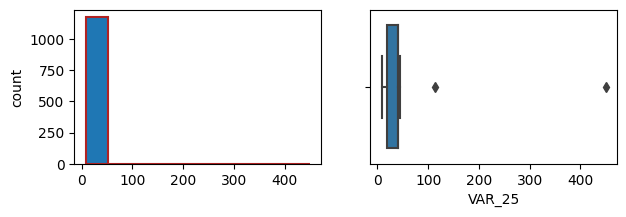

VAR_26
Skew : -1.34
Kurt : -0.21


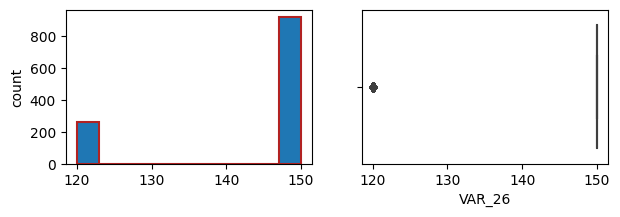

VAR_27
Skew : -0.68
Kurt : -0.05


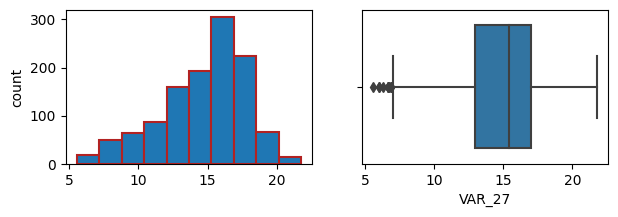

VAR_28
Skew : -1.12
Kurt : 3.5


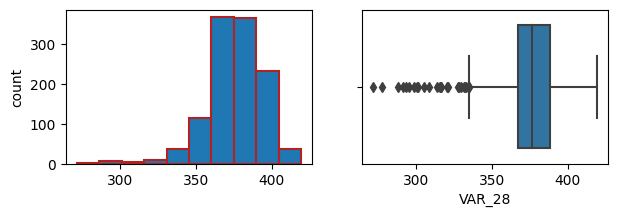

VAR_29
Skew : -0.98
Kurt : -0.54


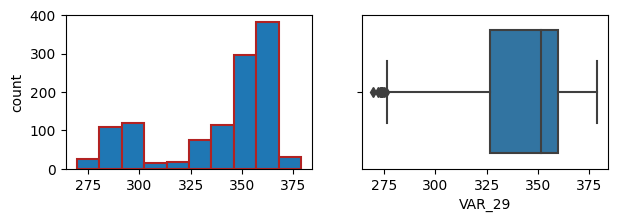

VAR_30
Skew : -1.77
Kurt : 7.17


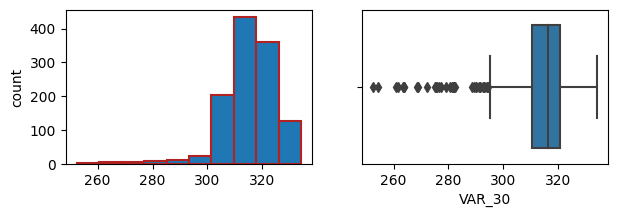

VAR_31
Skew : 0.37
Kurt : -0.18


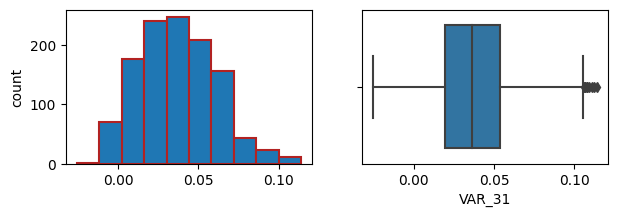

VAR_32
Skew : 0.23
Kurt : 1.94


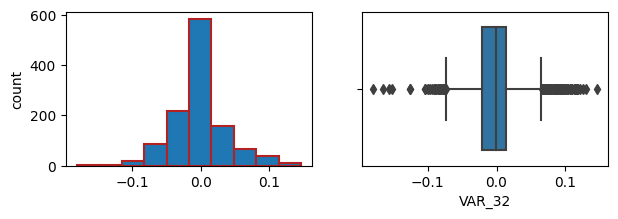

VAR_33
Skew : 0
Kurt : 0


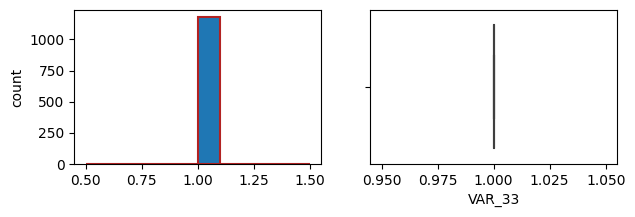

VAR_34
Skew : 2.18
Kurt : 3.7


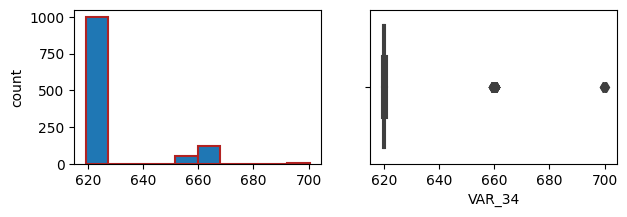

VAR_35
Skew : 10.16
Kurt : 102.03


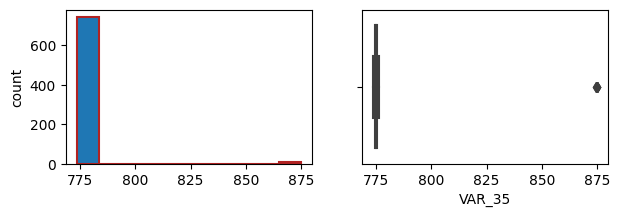

VAR_36
Skew : 12.7
Kurt : 161.22


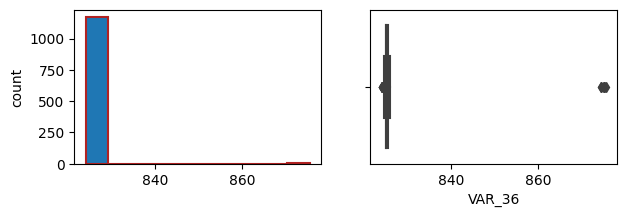

VAR_37
Skew : 12.65
Kurt : 160.36


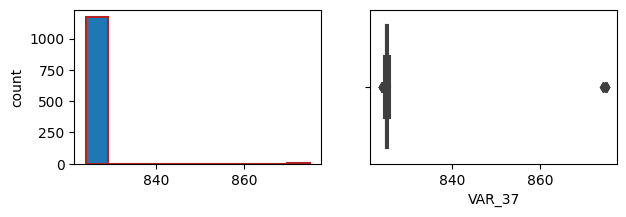

VAR_38
Skew : 0.39
Kurt : -1.86


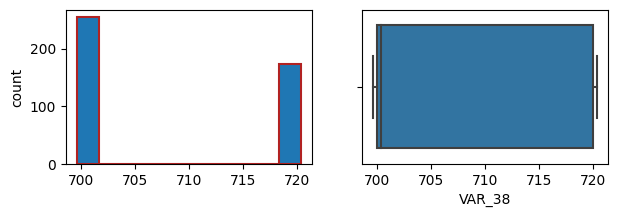

VAR_39
Skew : -1.38
Kurt : -0.09


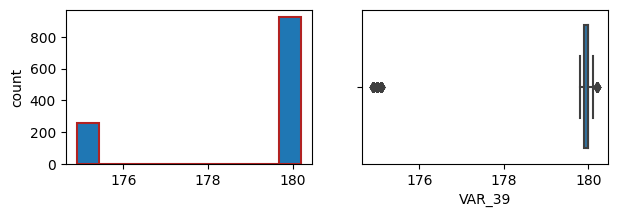

VAR_40
Skew : -1.51
Kurt : 0.9


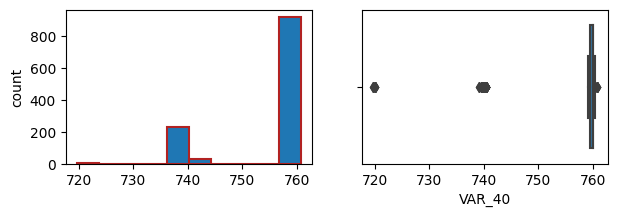

VAR_41
Skew : -1.52
Kurt : 0.91


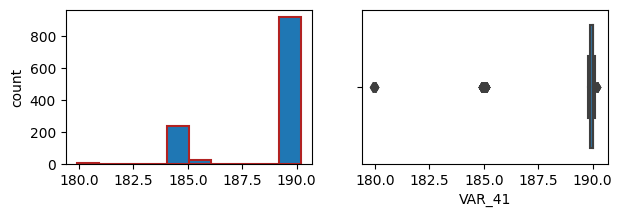

VAR_42
Skew : -10.21
Kurt : 102.65


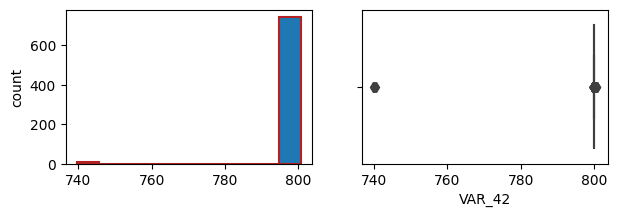

VAR_43
Skew : -2.15
Kurt : 6.3


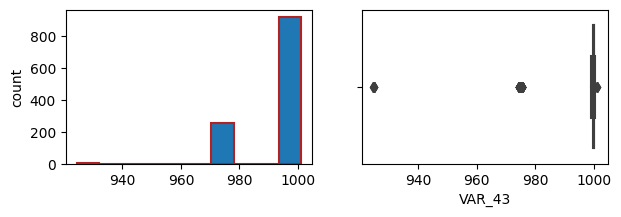

VAR_44
Skew : -12.85
Kurt : 163.67


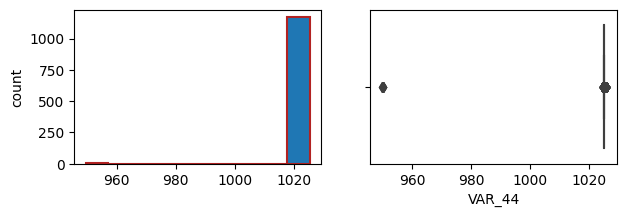

VAR_45
Skew : -12.86
Kurt : 163.8


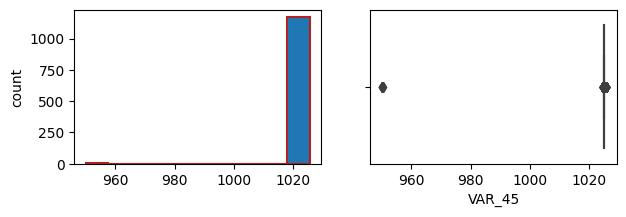

VAR_46
Skew : -12.44
Kurt : 156.73


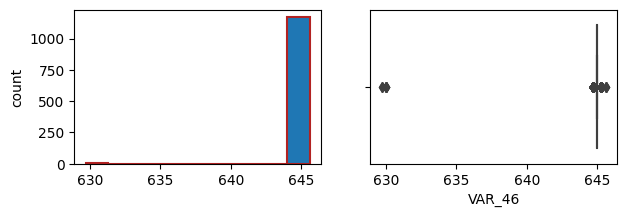

VAR_47
Skew : -12.53
Kurt : 158.36


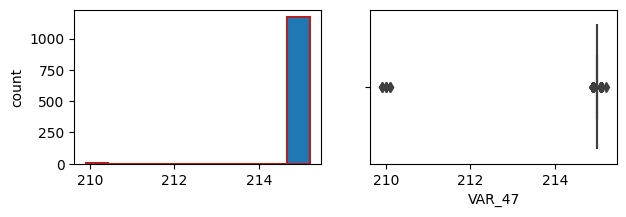

VAR_48
Skew : 0.03
Kurt : 0.01


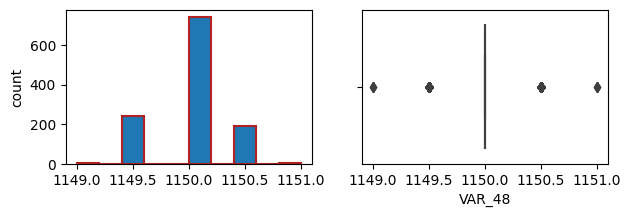

VAR_49
Skew : 0.15
Kurt : -0.14


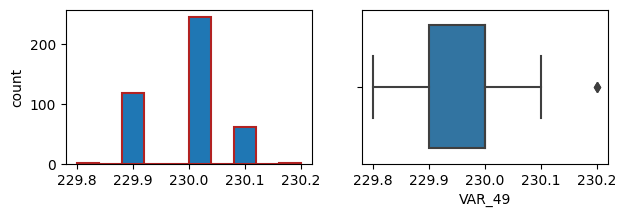

VAR_50
Skew : -0.57
Kurt : -1.62


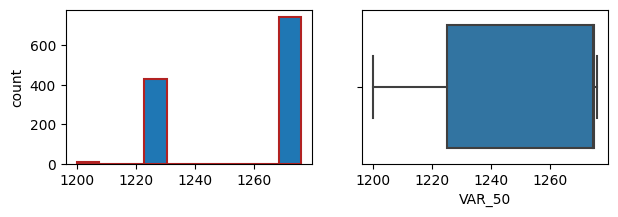

VAR_51
Skew : -0.57
Kurt : -1.63


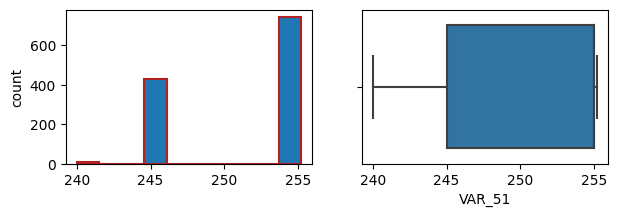

VAR_52
Skew : -2.13
Kurt : 6.15


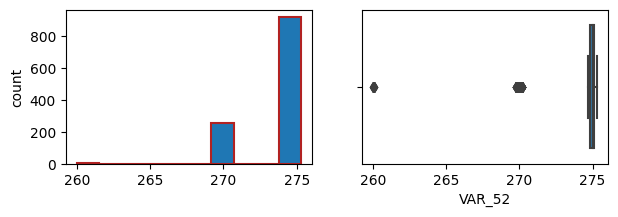

VAR_53
Skew : -2.15
Kurt : 6.3


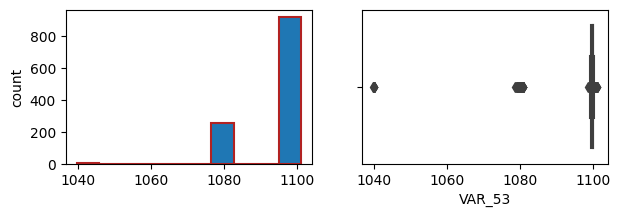

VAR_54
Skew : 12.88
Kurt : 164.28


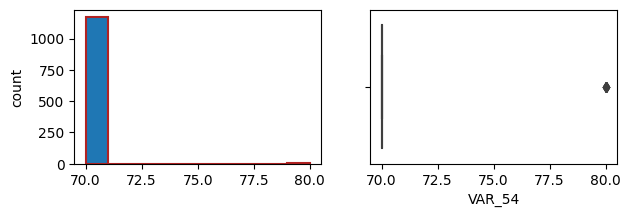

target
Skew : 1.8
Kurt : 1.24


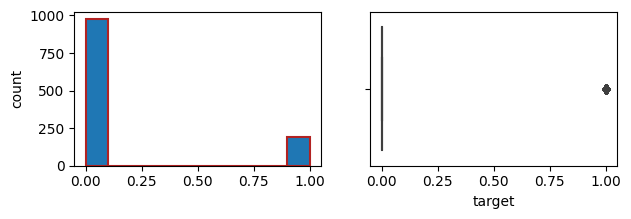

In [ ]:
# 전체 분포
# Skew 비대칭도 (왜도) : 정규분포에 가까워질수록 0에 가깝고, 음수일때는 왼쪽 부분에 양수일때는 오른쪽 부분에 긴 꼬리 분포
# Kurt 첨도 : 확률 분포의 뾰족한 정도를 나타냄, 0보다 크면 정규분포보다 뾰족한, 작은 경우 더 완만하고 납작한 분포
num_cols = train.select_dtypes(include=np.number).columns.tolist()

for col in num_cols:
    print(col)
    print('Skew :', round(train[col].skew(), 2))
    print('Kurt :', round(train[col].kurt(), 2))
    plt.figure(figsize = (7, 2))
    plt.subplot(1, 2, 1)
    train[col].hist(grid=False, edgecolor='firebrick', linewidth=1.5)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train[col])
    plt.show()

### 3. Visualize Target 0 VS 1

<Axes: >

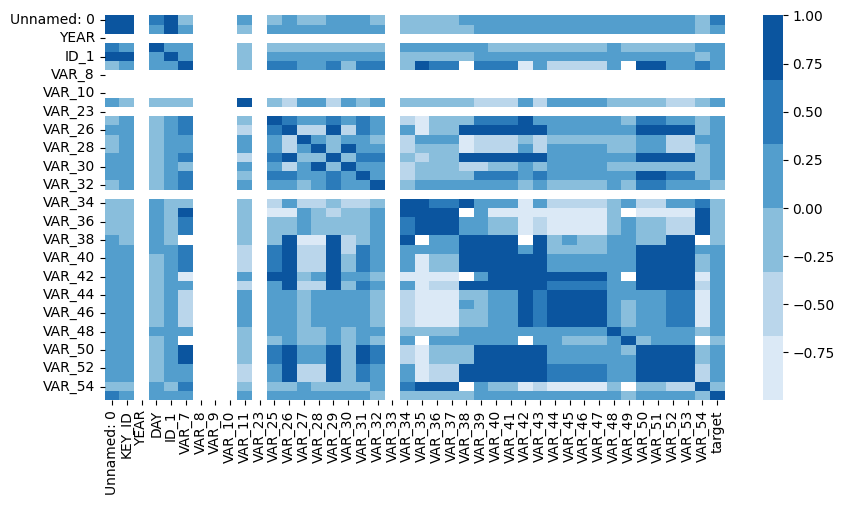

In [ ]:
# Featurer간 상관관계 분석
corr = train.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10, 5))
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap=cmap)

In [ ]:
# Target의 상관관계 찾기
df_corr = train.corr()
df_corr['target'].sort_values()

VAR_38       -0.151655
VAR_34       -0.121621
VAR_49       -0.064061
VAR_35       -0.049797
VAR_36       -0.037705
VAR_37       -0.036769
VAR_54       -0.034589
VAR_32       -0.012449
VAR_39        0.003230
VAR_26        0.009864
VAR_41        0.014004
VAR_40        0.014795
VAR_43        0.019606
VAR_52        0.020283
VAR_53        0.021430
VAR_48        0.032544
VAR_45        0.034233
VAR_47        0.034268
VAR_46        0.036434
VAR_44        0.036735
VAR_30        0.041398
VAR_27        0.044025
VAR_29        0.046258
VAR_42        0.046443
VAR_7         0.054192
VAR_28        0.057979
VAR_25        0.062953
VAR_11        0.067093
VAR_31        0.085634
VAR_51        0.095414
VAR_50        0.096147
DAY           0.174239
ID_1          0.267939
KEY_ID        0.267939
Unnamed: 0    0.350139
target        1.000000
YEAR               NaN
VAR_8              NaN
VAR_9              NaN
VAR_10             NaN
VAR_23             NaN
VAR_33             NaN
Name: target, dtype: float64

In [ ]:
# 다중공선성 : 독립 변수간 상관 관계 확인
# condition number가 8.85e+14으로 다중공선성의 문제가 존재하므로, 이를 해결하기 위해 정규화 진행
from statsmodels.formula.api import ols

model = ols("target ~ KEY_ID + ID_1 + DAY + VAR_38 + VAR_34", data=train)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     10.01
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           9.57e-08
Time:                        06:38:53   Log-Likelihood:                -109.54
No. Observations:                 425   AIC:                             229.1
Df Residuals:                     420   BIC:                             249.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.2864     25.356      0.445      0.6

In [ ]:
def plot_diff(feature):
    df_cp = train.copy()
    df_cp['target'] = df_cp['target'].astype('category')

    fig, (ax1, ax2) = plt.subplots(2,
                                   figsize=(5, 4),
                                   sharex=True,
                                   gridspec_kw={'height_ratios': (.7, .3)})

    for df, label in zip([df_zero, df_one], ['0', '1']):
        sns.histplot(data=df,
                     x=feature,
                     bins=15,
                     alpha=0.66,
                     edgecolor='firebrick',
                     label=label,
                     kde=False,
                     ax=ax1)
    ax1.legend()

    sns.boxplot(x=feature, y='target', data=df_cp, ax=ax2)
    ax2.set_ylabel('')
    ax2.set_yticklabels(['0', '1'])

    plt.tight_layout();

df_zero = train[train['target'] == 0]
df_one = train[train['target'] == 1]

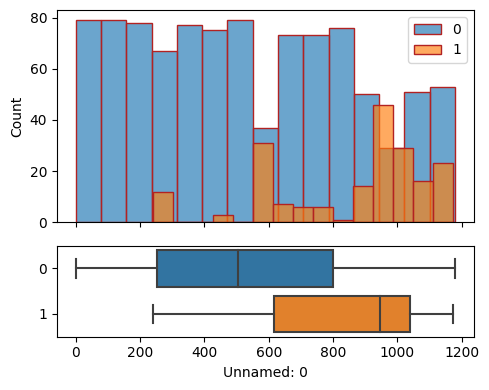

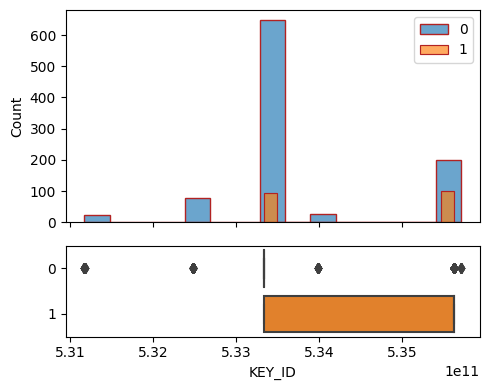

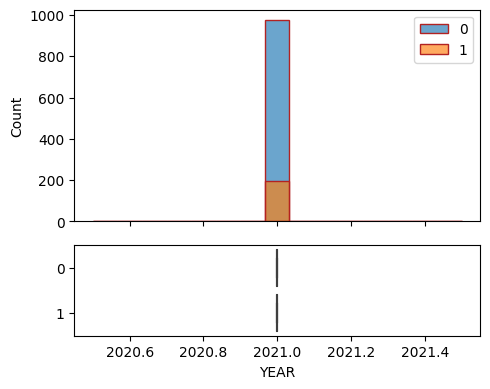

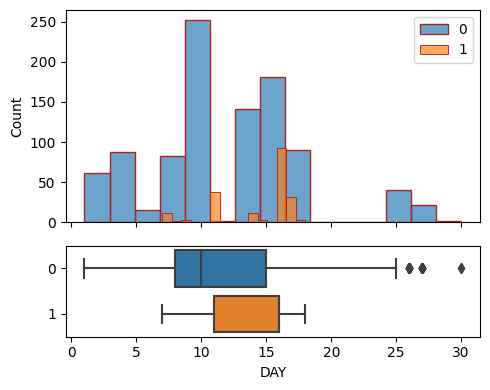

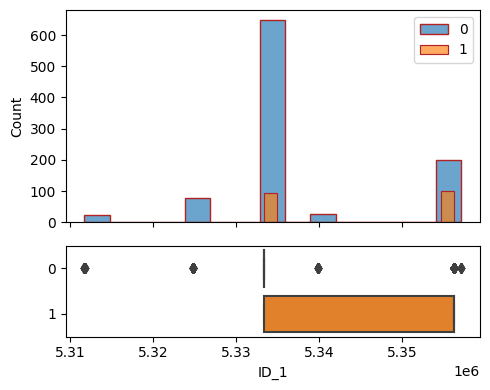

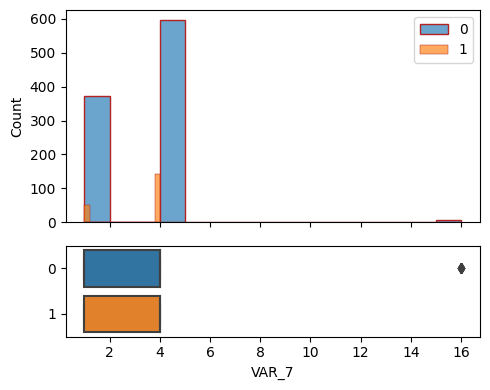

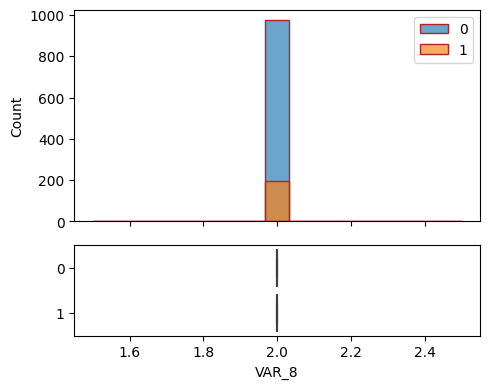

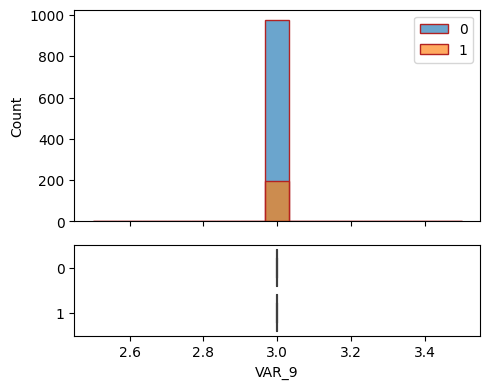

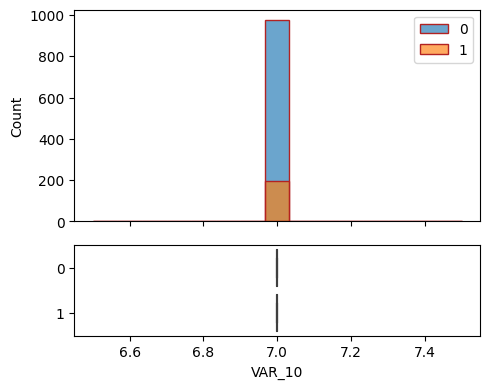

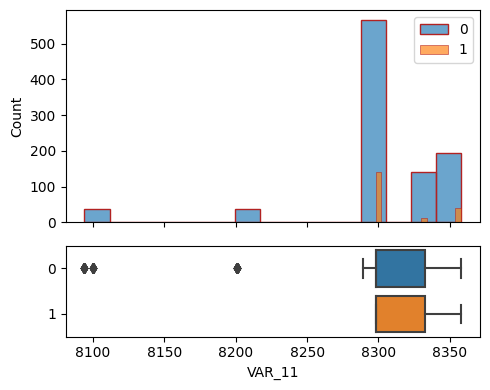

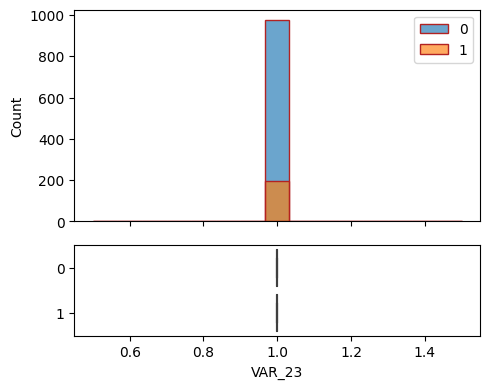

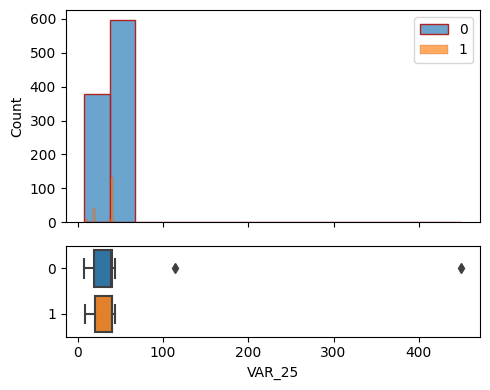

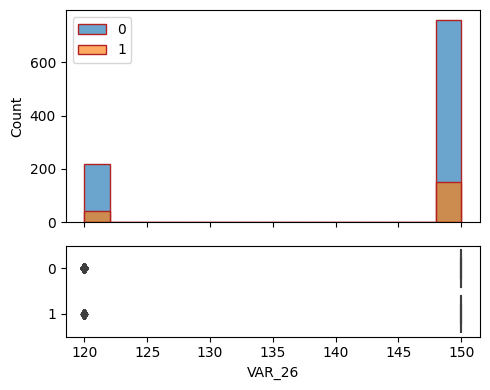

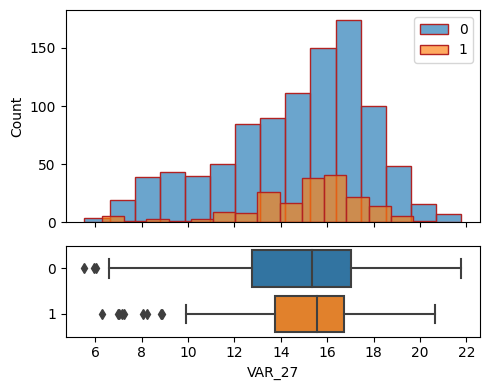

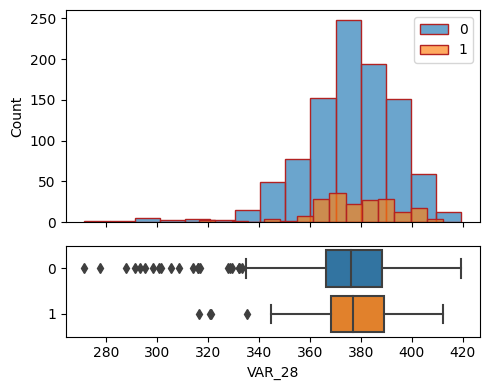

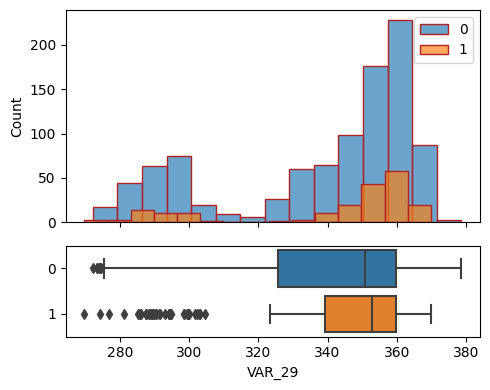

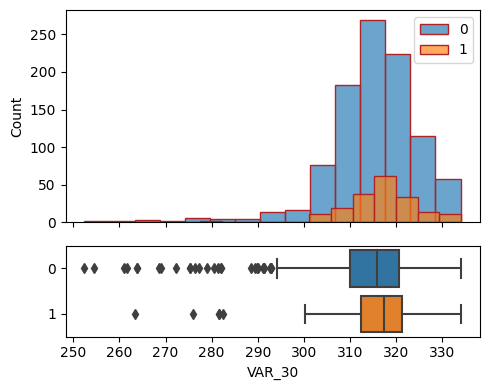

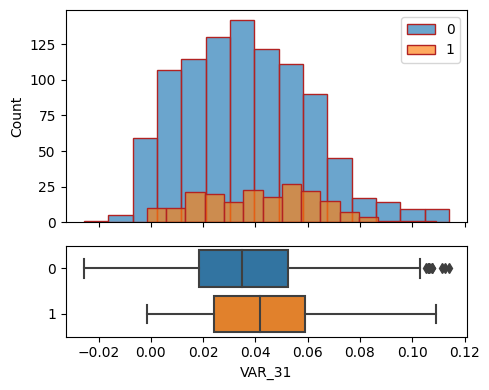

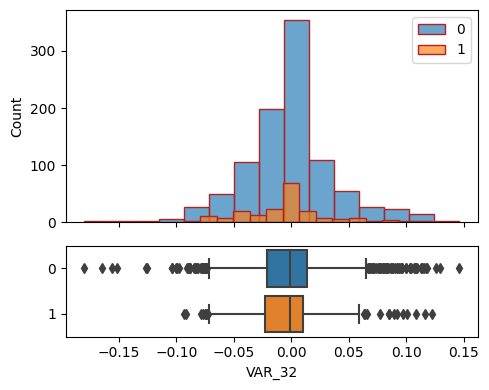

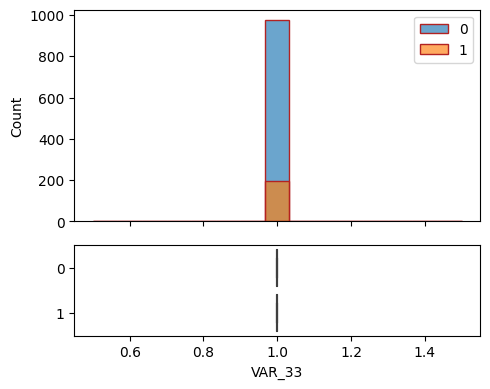

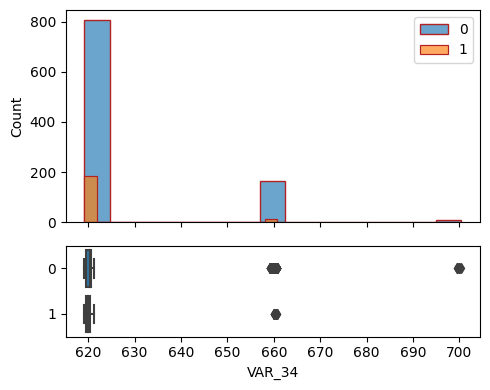

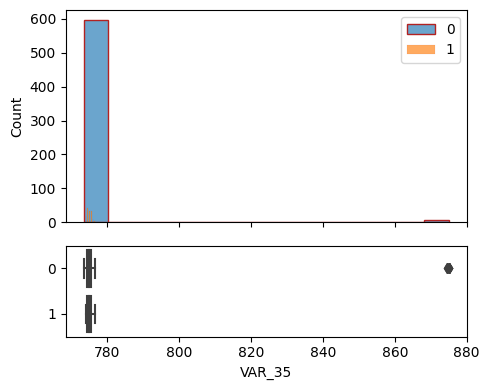

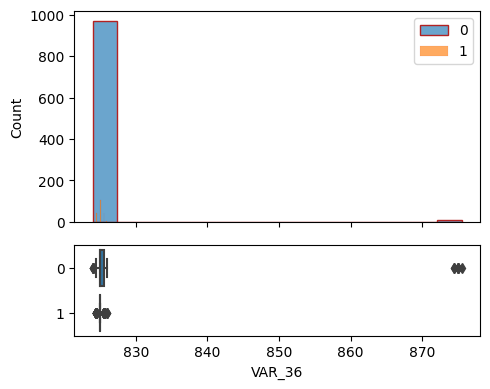

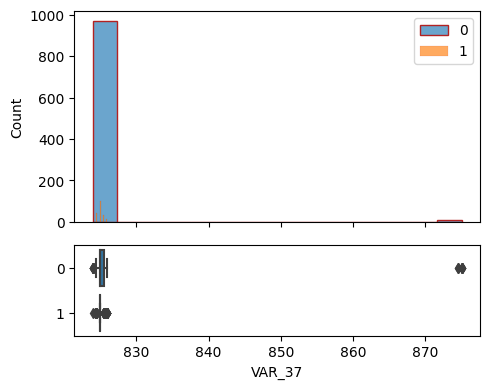

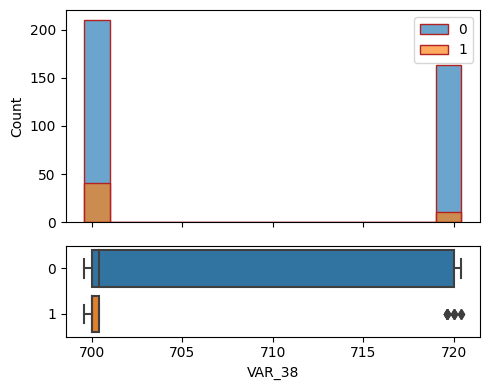

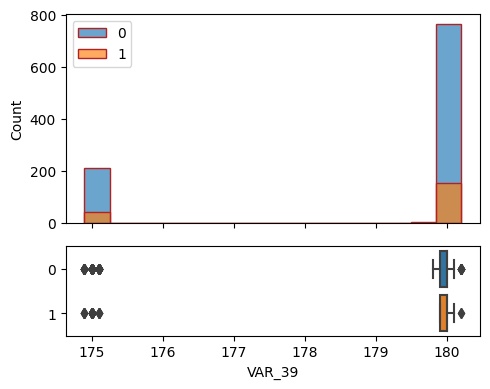

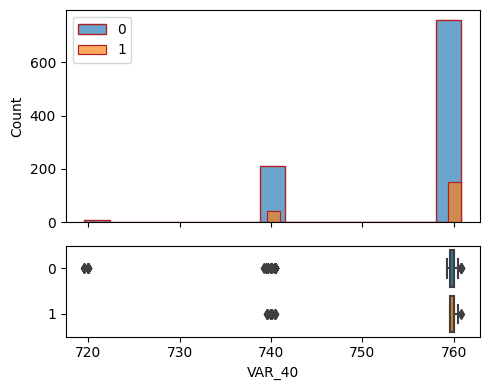

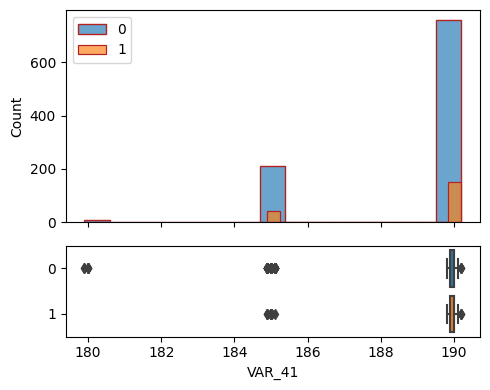

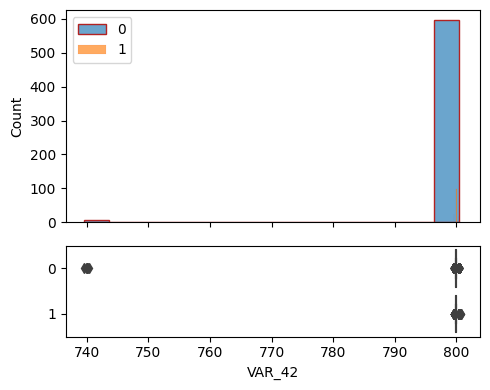

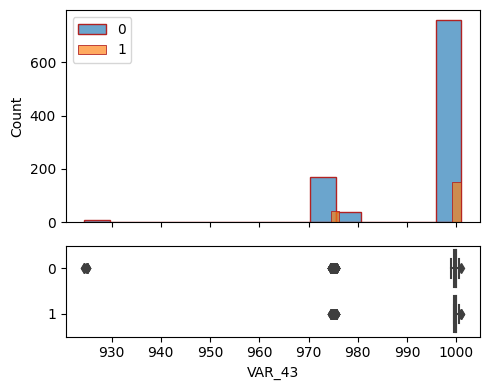

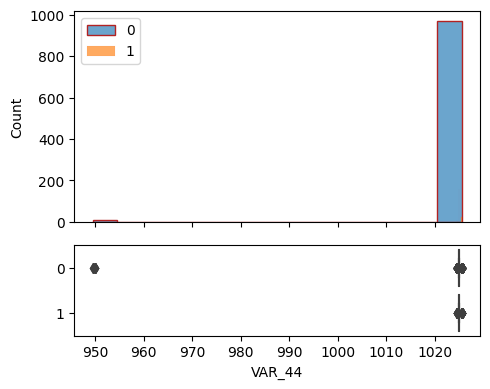

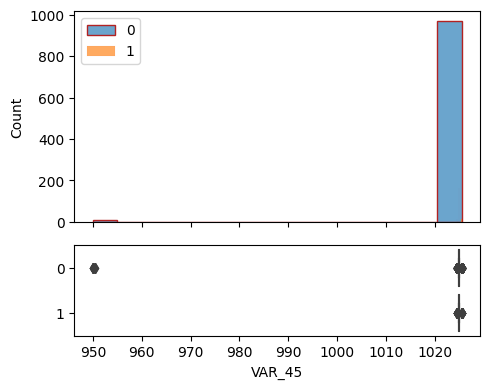

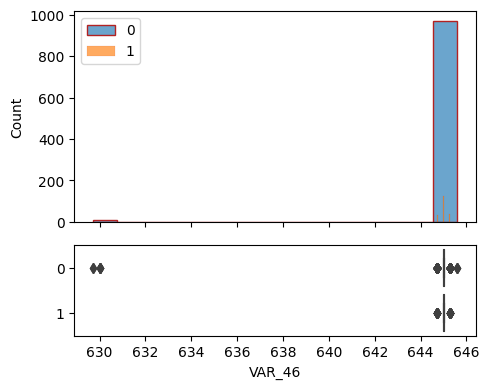

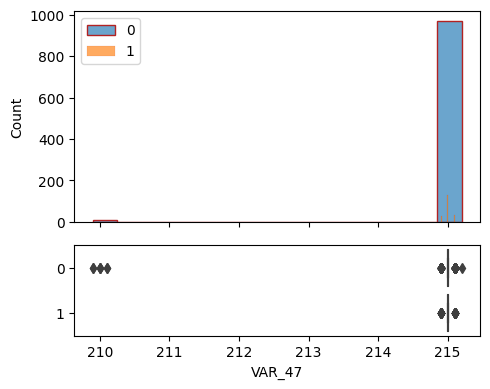

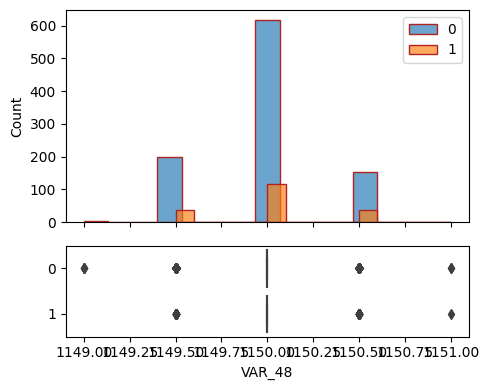

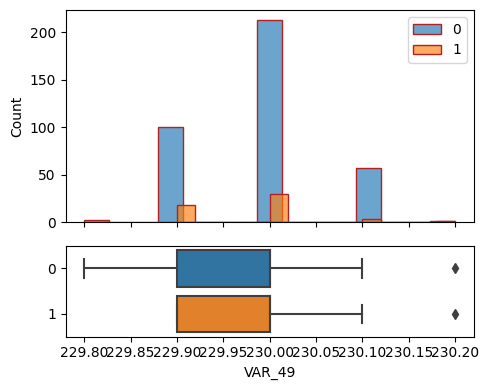

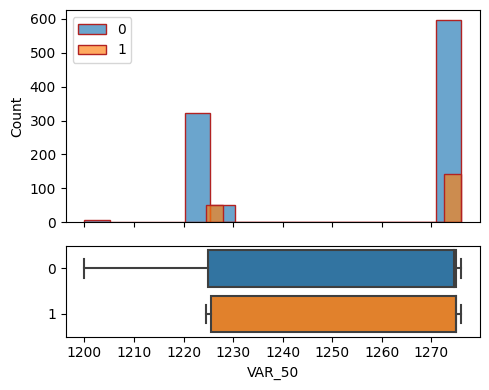

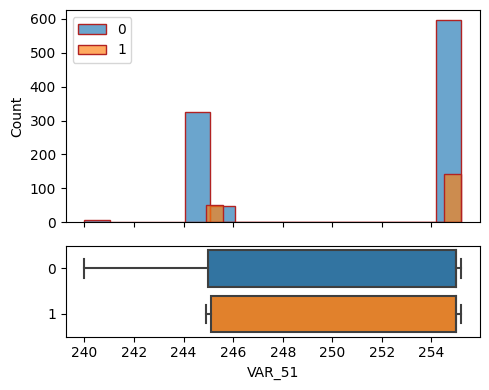

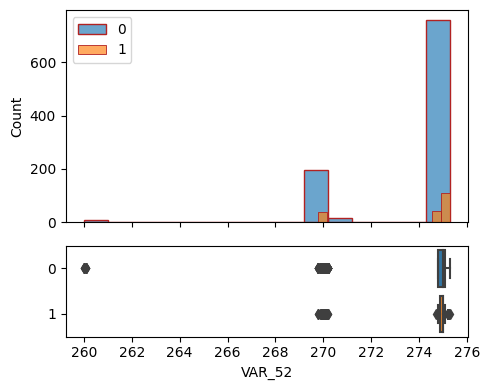

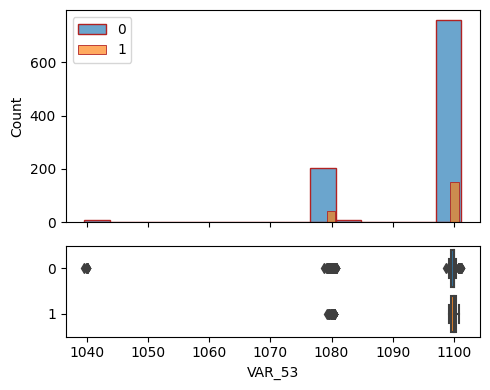

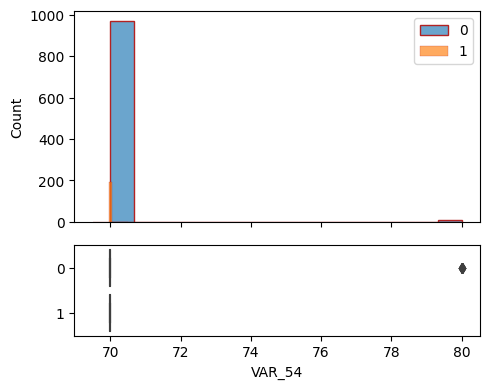

In [ ]:
# Target 0과 1의 데이터분포
categorical = train.select_dtypes(include=np.number).columns.tolist()
categorical.remove('target')

for col in categorical:
  plot_diff(col)

In [ ]:
# 데이터 series들 간의 상관관계
categorical = ['KEY_ID', 'YEAR', 'MONTH', 'DAY', 'ID_1', 'ID_2', 'ID_3', 'VAR_7', 'VAR_8', 'VAR_9', 'VAR_10',
               'VAR_11', 'VAR_12', 'VAR_13', 'VAR_14', 'VAR_15', 'VAR_16', 'VAR_17', 'VAR_18', 'VAR_19', 'VAR_20',
               'VAR_21', 'VAR_22', 'VAR_23', 'VAR_24', 'VAR_25', 'VAR_26', 'VAR_27', 'VAR_28', 'VAR_29', 'VAR_30',
               'VAR_31', 'VAR_32', 'VAR_33', 'VAR_34', 'VAR_35', 'VAR_36', 'VAR_37', 'VAR_38', 'VAR_39', 'VAR_40',
               'VAR_41', 'VAR_42', 'VAR_43', 'VAR_44', 'VAR_45', 'VAR_46', 'VAR_47', 'VAR_48', 'VAR_49', 'VAR_50', 'VAR_51', 'VAR_52', 'VAR_53', 'VAR_54', 'target']
g = sns.PairGrid(train[categorical], hue='target')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

### 4. Feature Engeeniring

In [ ]:
# Feature selection
# 의미있는 특성을 선택할 때, 일반적으로 p-value가 유의미하게 작은 특성들을 선택하는 것이 좋습니다.
# 즉, p-value가 0.05보다 작은 특성들을 우선적으로 고려하여 feature selection을 수행하였습니다.
# 결과적으로 tradeSessionAmountE 를 포함한 8개 항목을 제외하였습니다.
from scipy.stats import chi2_contingency

categorical = train.columns.values.tolist()
categorical.remove('target')

chi2_array, p_array = [], []
for col in categorical:
    crosstab = pd.crosstab(train[col], train['target'])
    chi2, p, dof, expected = chi2_contingency(crosstab)
    chi2_array.append(chi2)
    p_array.append(p)

df_chi = pd.DataFrame({
    'Variable': categorical,
    'Chi-square': chi2_array,
    'p-value': p_array
})
df_chi.sort_values(by='Chi-square', ascending=False)

Variable   Chi-square       p-value
0   Unnamed: 0  1170.000000  4.862542e-01
1       KEY_ID  1170.000000  4.862542e-01
29      VAR_28  1170.000000  4.780100e-01
30      VAR_29  1166.385151  4.830521e-01
31      VAR_30  1162.770302  4.881117e-01
28      VAR_27  1148.310905  4.918617e-01
4          DAY   517.658289  1.097421e-97
33      VAR_32   333.110538  4.263992e-01
5         ID_1   243.310328  3.364048e-36
32      VAR_31   203.652753  9.856076e-01
26      VAR_25   125.343240  8.073785e-01
6         ID_2    64.808614  1.571824e-10
12      VAR_11    34.514421  1.379678e-05
35      VAR_34    32.837965  1.802041e-03
51      VAR_50    21.307400  1.135328e-02
42      VAR_41    17.253207  4.489531e-02
44      VAR_43    14.200780  1.153602e-01
3        MONTH    13.460777  3.739064e-03
53      VAR_52    13.199405  4.325298e-01
39      VAR_38    12.726714  2.607888e-02
52      VAR_51    12.449948  1.322290e-01
43      VAR_42    11.543049  7.297452e-02
14      VAR_13    11.405742  3.336373e-03
8        VAR_7    10.969801  4.148949e-03
54      VAR_53    10.011545  7.613389e-01
45      VAR_44     9.057108  5.968779e-02
7         ID_3     8.627026  3.312118e-03
36      VAR_35     7.894586  4.438346e-01
41      VAR_40     7.542299  6.734465e-01
50      VAR_49     6.864360  1.432322e-01
13      VAR_12     6.235707  4.425205e-02
38      VAR_37     5.538857  4.767728e-01
37      VAR_36     5.048960  6.539883e-01
46      VAR_45     4.120871  3.898948e-01
48      VAR_47     4.107132  6.621811e-01
47      VAR_46     2.695801  7.467606e-01
40      VAR_39     2.559824  9.225253e-01
49      VAR_48     2.492770  6.459310e-01
22      VAR_21     0.978036  3.226841e-01
21      VAR_20     0.978036  3.226841e-01
19      VAR_18     0.978036  3.226841e-01
55      VAR_54     0.453540  5.006587e-01
17      VAR_16     0.221365  6.380016e-01
27      VAR_26     0.058852  8.083192e-01
34      VAR_33     0.000000  1.000000e+00
25      VAR_24     0.000000  1.000000e+00
24      VAR_23     0.000000  1.000000e+00
23      VAR_22     0.000000  1.000000e+00
20      VAR_19     0.000000  1.000000e+00
18      VAR_17     0.000000  1.000000e+00
16      VAR_15     0.000000  1.000000e+00
15      VAR_14     0.000000  1.000000e+00
11      VAR_10     0.000000  1.000000e+00
10       VAR_9     0.000000  1.000000e+00
9        VAR_8     0.000000  1.000000e+00
2         YEAR     0.000000  1.000000e+00

### 5. Data Cleansing

In [7]:
# 불필요한 column 제거
train = train.drop(['Unnamed: 0','VAR_14','VAR_15','VAR_17','VAR_18','VAR_19','VAR_20','VAR_21','VAR_22'], axis=1)
test = test.drop(['Unnamed: 0','VAR_14','VAR_15','VAR_17','VAR_18','VAR_19','VAR_20','VAR_21','VAR_22','VAR_55'], axis=1) # 'VAR_55'는 test dataset에만 있음

In [8]:
# NaN 처리
features = ['VAR_12','VAR_13','VAR_16']

for feature in features:
  train[feature] = pd.to_numeric(train[feature], errors='coerce')
  test[feature] = pd.to_numeric(test[feature], errors='coerce')

In [9]:
# Change string to int
train.loc[train['MONTH'] == 'December', 'MONTH'] = 12
train.loc[train['MONTH'] == 'November', 'MONTH'] = 11
train['MONTH'] = train['MONTH'].astype(int)

test.loc[test['MONTH'] == 'December', 'MONTH'] = 12
test.loc[test['MONTH'] == 'January', 'MONTH'] = 1
test['MONTH'] = test['MONTH'].astype(int)

In [10]:
# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder

features = ['ID_3','VAR_24']

for feature in features:
  train[feature] = LabelEncoder().fit_transform(train[feature])
  test[feature] = LabelEncoder().fit_transform(test[feature])

In [11]:
# Split string
def split_string(data, col):
  df_ID = pd.DataFrame(data[col], columns=[col])

  df_ID[col+'_n1'] = df_ID[col].str.extract('(\d+)(?=[A-Za-z])', expand=False)
  df_ID[col+'_n1'] = pd.to_numeric(df_ID[col+'_n1'])

  df_ID[col+'_n2'] = df_ID[col].str.extract('(?<=[A-Za-z])(\d+)', expand=False)
  df_ID[col+'_n2'] = pd.to_numeric(df_ID[col+'_n2'])

  df_ID[col+'_alph'] = df_ID[col].str.extract('([A-Za-z]+)', expand=False)

  # 원-핫 인코딩
  df_ID = pd.get_dummies(df_ID, columns=[col+'_alph'], prefix=col+'_alph')

  data = data.drop([col],axis=1)
  df_ID = df_ID.drop([col],axis=1)
  data = pd.concat([data, df_ID], axis = 1)

  return data

  data.head()

train = split_string(train, 'ID_2')
test = split_string(test, 'ID_2')

In [12]:
# Target 처리
train = train.dropna(subset=['target'])
train['target'] = train['target'].astype(int)

결측값 처리
1. Listwise Deletion
2. Mean / Median imputation
3. Model-based imputation

In [13]:
train_imp1 = train.copy()
train_imp2 = train.copy()
train_imp3 = train.copy()

In [14]:
test_imp1 = test.copy()
test_imp2 = test.copy()
test_imp3 = test.copy()

In [15]:
# 1. Listwise Deletion
train_imp1 = train_imp1.dropna(axis=1)
test_imp1 = test_imp1.dropna(axis=1)

In [16]:
# 2. Mode / Mean / Median imputation
features = train_imp2.select_dtypes(include=np.number).columns.tolist()

for feature in features:
  mode = train_imp2[feature].mode()[0]

  null_idx = train_imp2[feature].isnull()
  train_imp2.loc[null_idx, feature] = mode

  mode = test_imp2[feature].mode()[0]

  null_idx = test_imp2[feature].isnull()
  test_imp2.loc[null_idx, feature] = mode

In [21]:
# 3. Model-based imputation
!pip install miceforest
import miceforest as mf

features = train_imp3.select_dtypes(exclude='number').columns

for feature in features:
  train_imp3[feature] = train_imp3[feature].astype('category')
  test_imp3[feature] = test_imp3[feature].astype('category')

kds = mf.ImputationKernel(
    train_imp3,
    random_state=random_state
)
kds.mice(5)
train_imp3 = kds.complete_data()

kds = mf.ImputationKernel(
    test_imp3,
    random_state=random_state
)
kds.mice(5)
test_imp3 = kds.complete_data()

In [22]:
# Normalization
from sklearn.preprocessing import StandardScaler

X_train, y_train = train_imp3.drop(columns='target'), train_imp3['target']
X_test, y_test = test_imp3.drop(columns='target'), test_imp3['target']

sca_columns = ['VAR_25','VAR_31','VAR_32','VAR_27','VAR_28','VAR_29','VAR_30']
scaler = StandardScaler()
# scaler = MinMaxScaler()
X_train[sca_columns] = scaler.fit_transform(X_train[sca_columns])
X_test[sca_columns] = scaler.fit_transform(X_test[sca_columns])

In [23]:
X_train, y_train = train_imp3.drop(columns='target').values, train_imp3['target'].values
X_test, y_test = test_imp3.drop(columns='target').values, test_imp3['target'].values

PCA Component별 변동성: [7.41722824e-01 2.58277176e-01 1.07919444e-15 9.15838831e-16
 1.48044421e-16 9.77883488e-17 8.35335349e-17 2.56665035e-17
 1.93097736e-17 1.47992823e-17 5.05036402e-18 1.23823252e-18
 2.11679441e-19 1.33497060e-19 9.97026256e-20 7.13440916e-20
 6.92612379e-20 4.90722287e-20 4.03685410e-20 2.81255683e-20
 2.41941952e-20 2.29511421e-20 1.89664593e-20 1.55495784e-20
 6.35539018e-21 5.79286077e-21 4.52952649e-21 2.18429419e-21
 1.82054431e-21 1.44496452e-21 1.42335507e-21 1.14239112e-21
 7.05792115e-22 6.86243610e-22 3.95715172e-22 7.77931955e-23
 3.30178720e-23 6.00207643e-24 7.88824840e-30 6.84672342e-33
 6.84672342e-33 6.84672342e-33 6.84672342e-33 6.84672342e-33
 6.84672342e-33 6.84672342e-33 6.84672342e-33 6.84672342e-33
 6.84672342e-33 6.84672342e-33 6.82229760e-33]


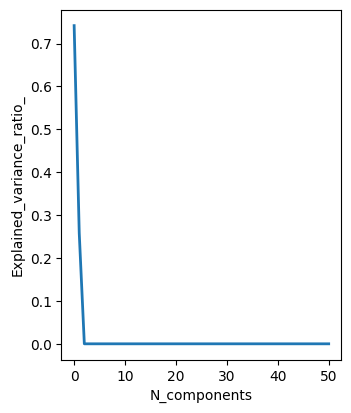

In [26]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

plt.figure(1, figsize=(4, 5))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('N_components')
plt.ylabel('Explained_variance_ratio_')

print('PCA Component별 변동성:', pca.explained_variance_ratio_)

불균형 데이터 처리
1. Over-sampling (Random)
2. Over-sampling (SMOTE)
3. Configure class weight

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Bagging Classifier (KNeighborsClassifier)
# Best score : 0.9686440677966102
bc_kn = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=random_state, n_estimators=700)
bc_kn.fit(X_train, y_train)
y_pred = bc_kn.predict(X_test)

print('The accuracy for bagged KNN is:', accuracy_score(y_pred, y_test))

The accuracy for bagged KNN is: 0.9686440677966102


In [ ]:
# 1.Over-sampling (Random)
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=random_state)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [ ]:
model1 = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=random_state, n_estimators=700)
model1.fit(X_train_ros, y_train_ros)
y_pred = model1.predict(X_test)

print('The accuracy for bagged KNN is:', accuracy_score(y_pred, y_test))

The accuracy for bagged KNN is: 0.9593220338983051


In [ ]:
# 2.Over-sampling (SMOTE)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=random_state)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [ ]:
model1 = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=random_state, n_estimators=700)
model1.fit(X_train_sm, y_train_sm)
y_pred = model1.predict(X_test)

print('The accuracy for bagged KNN is:', accuracy_score(y_pred, y_test))

The accuracy for bagged KNN is: 0.9686440677966102


In [ ]:
# 3. Configure class weight
from sklearn.model_selection import GridSearchCV

n_samples = train.shape[0]
n_features = train.shape[1]

param_grid = {'base_estimator': [None, LogisticRegression(), KNeighborsClassifier()],
          'n_estimators': [20,50,100,700],
          'max_samples': [0.5, 1.0, n_samples//2, ],
          'max_features': [0.5, 1.0, n_features//2, ],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

grid = GridSearchCV(BaggingClassifier(random_state=random_state, n_jobs=-1), param_grid)

grid_result = grid.fit(X_train, y_train)
y_pred = grid_result.predict(X_test)

print('The accuracy for bagged KNN is:', accuracy_score(y_pred, y_test))

The accuracy for bagged KNN is: 0.9686440677966102


In [ ]:
# X_train, y_train = X_train_sm, y_train_sm

### 6. Modeliong
1. Supervised Learning
2. Semi-supervised Learning

Supervised Learning

In [ ]:
# 데이터 차원 확인
print("train X :", X_train.shape)
print("train Y :", y_train.shape)
print("test X :", X_test.shape)
print("test Y :", y_test.shape)

train X : (1170, 51)
train Y : (1170,)
test X : (1180, 51)
test Y : (1180,)


In [35]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

import sklearn.svm as svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_predict, KFold, cross_val_score, cross_validate
from sklearn.model_selection import learning_curve
from sklearn.metrics import recall_score, precision_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.semi_supervised import LabelPropagation, LabelSpreading
import torch

In [29]:
def plot_conf_mx(cm, ax):
    sns.heatmap(data=cm,
                annot=True,
                cmap='Blues',
                ax=ax)

    ax.set_xlabel('Predicted Label')
    ax.set_xticks([0.5, 1.5])
    ax.set_xticklabels(['0', '1'])

    ax.set_ylabel('True Label')
    ax.set_yticks([0.25, 1.25])
    ax.set_yticklabels(['0', '1']);

def plot_learning_curve(estimator,
                        X,
                        y,
                        ax,
                        cv=None,
                        train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=-1,
        train_sizes=train_sizes,
        scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax.fill_between(train_sizes,
                    train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std,
                    alpha=0.1,
                    color='dodgerblue')
    ax.fill_between(train_sizes,
                    test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std,
                    alpha=0.1,
                    color='darkorange')

    ax.plot(train_sizes,
            train_scores_mean,
            color='dodgerblue',
            marker='o',
            linestyle='-',
            label='Training Score')
    ax.plot(train_sizes,
            test_scores_mean,
            color='darkorange',
            marker='o',
            linestyle='-',
            label='Cross-validation Score')

    ax.set_xlabel('Training Examples')
    ax.set_ylabel('Score')
    ax.legend(loc='best', fontsize=10);

def pgs_performance(classifier, classifier_name, classifier_name_abv):
    print('\n', classifier_name)
    print('-------------------------------')
    print('   Best Score ({}): '.format(scoring_metric) + str(np.round(classifier.best_score_, 3)))
    print('   Best Parameters: ')
    for key, value in classifier.best_params_.items():
        print('      {}: {}'.format(key, value))

    y_pred_pp = cross_val_predict(estimator=classifier.best_estimator_,
                                  X=X_train,
                                  y=y_train,
                                  cv=5,
                                  method='predict')
    y_pred = y_pred_pp.round()

    cm = confusion_matrix(y_train, y_pred, normalize='true')

    fpr, tpr, _ = roc_curve(y_train, y_pred_pp)
    comparison_dict[classifier_name_abv] = [
        accuracy_score(y_train, y_pred),
        precision_score(y_train, y_pred),
        recall_score(y_train, y_pred),
        roc_auc_score(y_train, y_pred_pp), fpr, tpr
    ]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

    plot_conf_mx(cm, ax1)
    plot_learning_curve(classifier.best_estimator_, X_train, y_train, ax2)

    plt.tight_layout();


In [ ]:
# Support Vector Machine(linear-SVM)
# Best score : 0.9159256265157639
svm = svm.SVC(C=1, gamma=0.1, probability=True, random_state=random_state)
param_grid = tuned_parameters = [
                                {'kernel': ['linear'],
                                  'C': [.1, 1, 10]
                                 }
                                ]

svm_pgs = GridSearchCV(estimator=svm,
                       param_grid=param_grid,
                       scoring=scoring_metric,
                       cv=5,
                       verbose=False,
                       n_jobs=-1)

best_svc_pgs = svm_pgs.fit(X_train, y_train)
pgs_performance(best_svc_pgs, 'Support Vector Classifier', 'SVC')

svc_prediction = best_svc_pgs.predict(X_test)
print('Accuracy for SVM is ', accuracy_score(svc_prediction, y_test))


 Logistic Regression
-------------------------------
   Best Score (recall): 0.0
   Best Parameters: 
      max_iter: 100
      penalty: l2
      solver: lbfgs
The accuracy of the Logistic Regression is 0.9686440677966102


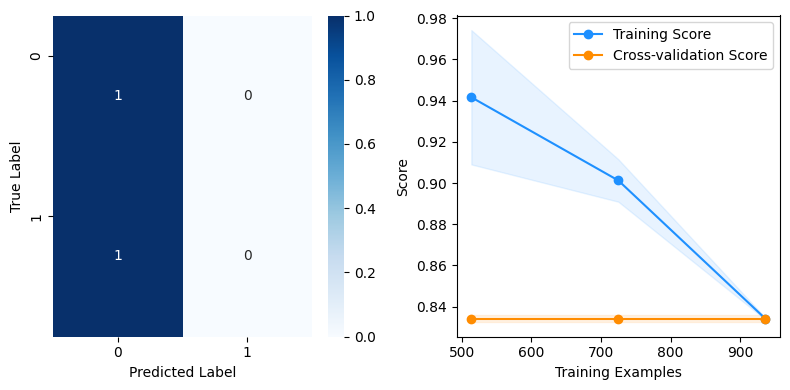

In [39]:
# Logistic Regression
# Best score : 0.9686440677966102
lr = LogisticRegression(random_state=random_state)

param_grid = {
    'max_iter': [100],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs']
}

lr_pgs = GridSearchCV(estimator=lr,
                      param_grid=param_grid,
                      scoring=scoring_metric,
                      cv=5,
                      verbose=False,
                      n_jobs=-1)

best_lr_pgs = lr_pgs.fit(X_train, y_train)
pgs_performance(best_lr_pgs, 'Logistic Regression', 'LR')

lr_prediction = best_lr_pgs.predict(X_test)
print('The accuracy of the Logistic Regression is', accuracy_score(lr_prediction, y_test))


 Decision Tree
-------------------------------
   Best Score (recall): 0.439
   Best Parameters: 
      max_depth: None
      min_samples_leaf: 7
      min_samples_split: 2
The accuracy of the Decision Tree is 0.6686440677966101


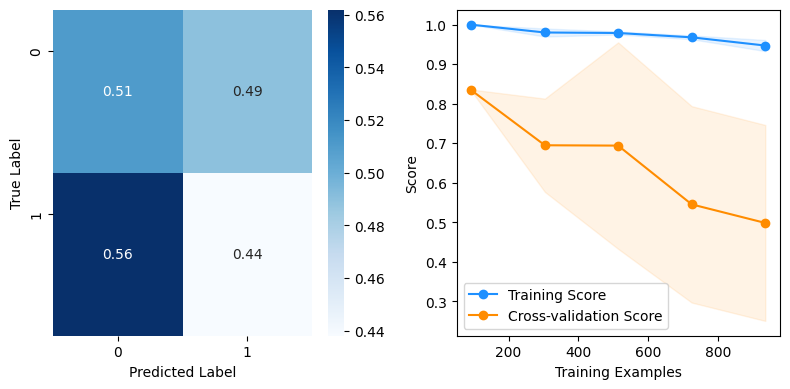

In [40]:
# Decision Tree
# Best score : 0.6686440677966101
dt = DecisionTreeClassifier(random_state=random_state)

param_grid ={
    "min_samples_leaf":[1, 2, 3, 4, 5, 6, 7, 8, 9],
    "max_depth":[2, 3, 4, 5, 6, None],
    "min_samples_split":[2, 3, 4, 5, 6, 7, 8, 9, 10]
}

dt_pgs = GridSearchCV(estimator=dt,
                      param_grid=param_grid,
                      scoring=scoring_metric,
                      cv=5,
                      verbose=False,
                      n_jobs=-1)

best_dt_pgs = dt_pgs.fit(X_train, y_train)
pgs_performance(best_dt_pgs, 'Decision Tree', 'DT')

dt_prediction = best_dt_pgs.predict(X_test)
print('The accuracy of the Decision Tree is', accuracy_score(dt_prediction, y_test))


 K-Nearest Neighbors
-------------------------------
   Best Score (recall): 0.392
   Best Parameters: 
      metric: manhattan
      n_neighbors: 4
      weights: distance
The accuracy of the KNN is 0.9686440677966102


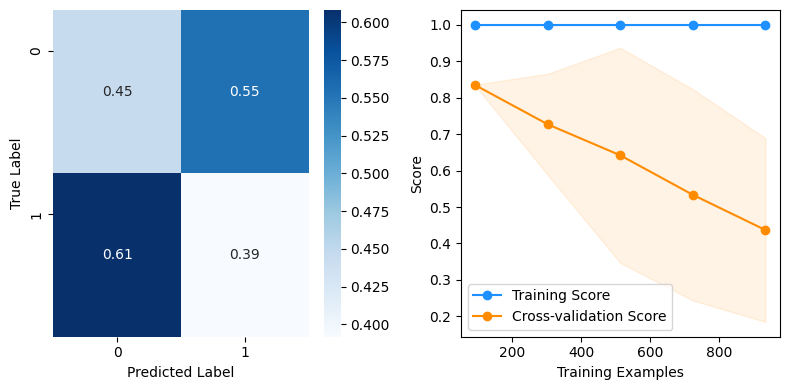

In [41]:
# K-Nearest Neighbors(KNN)
# Best score : 0.9686440677966102
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors' : list(range(1, 20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

knn_pgs = GridSearchCV(estimator=knn,
                      param_grid=param_grid,
                      scoring=scoring_metric,
                      cv=5,
                      verbose=False,
                      n_jobs=-1)

best_knn_pgs = knn_pgs.fit(X_train, y_train)
pgs_performance(best_knn_pgs, 'K-Nearest Neighbors', 'KNN')

knn_prediction = best_knn_pgs.predict(X_test)
print('The accuracy of the KNN is', accuracy_score(knn_prediction, y_test))


 Random Forest
-------------------------------
   Best Score (recall): 0.031
   Best Parameters: 
      bootstrap: True
      criterion: gini
      max_depth: 6
      max_features: auto
      min_samples_leaf: 2
      min_samples_split: 5
      n_estimators: 100
The accuracy of the Random Forests is 0.9686440677966102


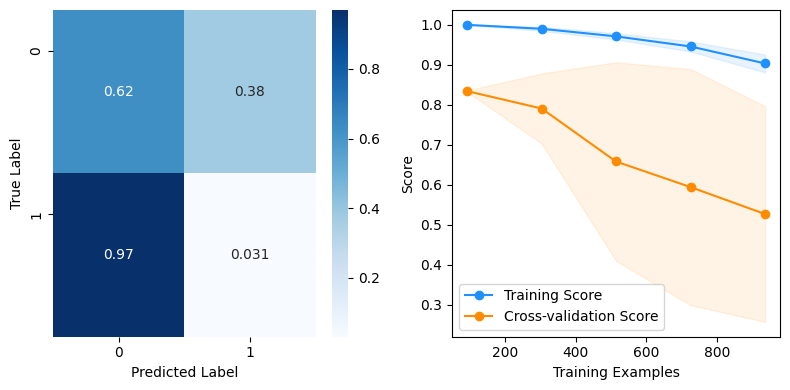

In [43]:
# Random Forest
# Best score : 0.9686440677966102
rf = RandomForestClassifier(random_state=random_state)

param_grid = {
    'n_estimators': [100],
    'criterion': ['entropy', 'gini'],
    'bootstrap': [True, False],
    'max_depth': [6],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [2, 3, 5],
    'min_samples_split': [2, 3, 5]
}

rf_pgs = GridSearchCV(estimator=rf,
                      param_grid=param_grid,
                      scoring=scoring_metric,
                      cv=5,
                      verbose=False,
                      n_jobs=-1)

best_rf_pgs = rf_pgs.fit(X_train, y_train)
pgs_performance(best_rf_pgs, 'Random Forest', 'RF')

rf_prediction = best_rf_pgs.predict(X_test)
print('The accuracy of the Random Forests is', accuracy_score(rf_prediction, y_test))

[LightGBM] [Info] Number of positive: 194, number of negative: 976
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2086
[LightGBM] [Info] Number of data points in the train set: 1170, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.165812 -> initscore=-1.615604
[LightGBM] [Info] Start training from score -1.615604

 LGBMClassifier
-------------------------------
   Best Score (recall): 0.438
   Best Parameters: 
      max_depth: 5
      min_child_samples: 5
      n_estimators: 200
      num_leaves: 5
      reg_alpha: 0.1
      reg_lambda: 0.1
[LightGBM] [Info] Number of positive: 156, number of negative: 780
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_row_wise=true` to remove

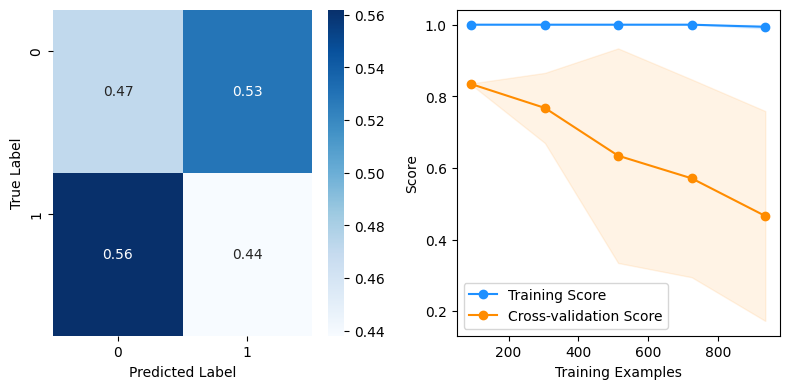

In [44]:
# LGBMClassifier
# Best score : 0.9677966101694915
lgbmc = LGBMClassifier(random_state=random_state)

param_grid = {
    'max_depth': [5],
    'num_leaves': [5, 10],
    'n_estimators': [200],
    'min_child_samples': [5, 10],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [0.1, 0.5]
}

lgbmc_pgs = GridSearchCV(estimator=lgbmc,
                         param_grid=param_grid,
                         scoring=scoring_metric,
                         cv=5,
                         verbose=False,
                         n_jobs=-1)

best_lgbmc_pgs = lgbmc_pgs.fit(X_train, y_train)
pgs_performance(best_lgbmc_pgs, 'LGBMClassifier', 'LGBMC')

lgbmc_prediction = best_lgbmc_pgs.predict(X_test)
print('The accuracy of the LGBMClassifier is', accuracy_score(lgbmc_prediction, y_test))

In [45]:
# Gradient Boosting Classifier
# Best score : 0.861864406779661
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
best_gb = gb.fit(X_train, y_train)
prediction = best_gb.predict(X_test)
print('The accuracy for Gradient Boostin is:', accuracy_score(prediction, y_test))

y_pred_pp = cross_val_predict(estimator=best_gb,
                                  X=X_train,
                                  y=y_train,
                                  cv=5,
                                  method='predict')
y_pred = y_pred_pp.round()

cm = confusion_matrix(y_train, y_pred, normalize='true')

fpr, tpr, _ = roc_curve(y_train, y_pred_pp)
comparison_dict['GB'] = [
    accuracy_score(y_train, y_pred),
    precision_score(y_train, y_pred),
    recall_score(y_train, y_pred),
    roc_auc_score(y_train, y_pred_pp), fpr, tpr
]

The accuracy for Gradient Boostin is: 0.861864406779661


In [46]:
# XGBoost Classifier
# Best score : 0.8313559322033899
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=900,learning_rate=0.1)
best_xgb = xgb.fit(X_train, y_train)
prediction = best_xgb.predict(X_test)
print('The accuracy for XGBoost is:', accuracy_score(prediction, y_test))

y_pred_pp = cross_val_predict(estimator=best_xgb,
                                  X=X_train,
                                  y=y_train,
                                  cv=5,
                                  method='predict')
y_pred = y_pred_pp.round()

cm = confusion_matrix(y_train, y_pred, normalize='true')

fpr, tpr, _ = roc_curve(y_train, y_pred_pp)
comparison_dict['XGB'] = [
    accuracy_score(y_train, y_pred),
    precision_score(y_train, y_pred),
    recall_score(y_train, y_pred),
    roc_auc_score(y_train, y_pred_pp), fpr, tpr
]

The accuracy for XGBoost is: 0.8313559322033899


In [47]:
# Bagging Classifier (KNeighborsClassifier)
# Best score : 0.9686440677966102
bc_kn = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
best_bckn = bc_kn.fit(X_train, y_train)
prediction = best_bckn.predict(X_test)
print('The accuracy for bagged KNN is:', accuracy_score(prediction, y_test))

y_pred_pp = cross_val_predict(estimator=best_bckn,
                                  X=X_train,
                                  y=y_train,
                                  cv=5,
                                  method='predict')
y_pred = y_pred_pp.round()

cm = confusion_matrix(y_train, y_pred, normalize='true')

fpr, tpr, _ = roc_curve(y_train, y_pred_pp)
comparison_dict['BCKNN'] = [
    accuracy_score(y_train, y_pred),
    precision_score(y_train, y_pred),
    recall_score(y_train, y_pred),
    roc_auc_score(y_train, y_pred_pp), fpr, tpr
]

The accuracy for bagged KNN is: 0.9686440677966102


In [48]:
# BaggingClassifier (DecisionTreeClassifier)
# Best score : 0.8940677966101694
bc_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
best_bcdt = bc_dt.fit(X_train, y_train)
prediction = best_bcdt.predict(X_test)
print('The accuracy for bagged Decision Tree is:', accuracy_score(prediction, y_test))

y_pred_pp = cross_val_predict(estimator=best_bcdt,
                                  X=X_train,
                                  y=y_train,
                                  cv=5,
                                  method='predict')
y_pred = y_pred_pp.round()

cm = confusion_matrix(y_train, y_pred, normalize='true')

fpr, tpr, _ = roc_curve(y_train, y_pred_pp)
comparison_dict['BCDT'] = [
    accuracy_score(y_train, y_pred),
    precision_score(y_train, y_pred),
    recall_score(y_train, y_pred),
    roc_auc_score(y_train, y_pred_pp), fpr, tpr
]

The accuracy for bagged Decision Tree is: 0.8940677966101694


In [49]:
# AdaBoostClassifier
# Best score : 0.8559322033898306
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
best_abc = abc.fit(X_train, y_train)
prediction = best_abc.predict(X_test)
print('The accuracy for AdaBoost is:', accuracy_score(prediction, y_test))

y_pred_pp = cross_val_predict(estimator=best_abc,
                                  X=X_train,
                                  y=y_train,
                                  cv=5,
                                  method='predict')
y_pred = y_pred_pp.round()

cm = confusion_matrix(y_train, y_pred, normalize='true')

fpr, tpr, _ = roc_curve(y_train, y_pred_pp)
comparison_dict['ABC'] = [
    accuracy_score(y_train, y_pred),
    precision_score(y_train, y_pred),
    recall_score(y_train, y_pred),
    roc_auc_score(y_train, y_pred_pp), fpr, tpr
]

The accuracy for AdaBoost is: 0.8559322033898306


### 7. Prediction

In [50]:
comparison_matrix = {}
for key, value in comparison_dict.items():
    comparison_matrix[str(key)] = value[0:4]

comparison_df = pd.DataFrame(comparison_matrix,
                             index=['Accuracy', 'Precision', 'Recall', 'AUC']).T
comparison_df.style.highlight_max(color='indianred', axis=0)

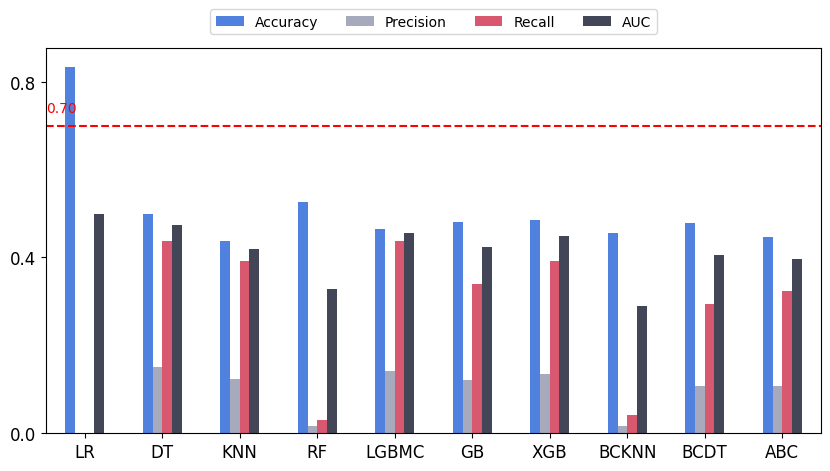

In [51]:
comparison_df.plot(kind='bar',
                   figsize=(10, 5),
                   fontsize=12,
                   color=['#5081DE', '#A7AABD', '#D85870', '#424656'])

plt.legend(loc='upper center',
           ncol=len(comparison_df.columns),
           bbox_to_anchor=(0.5, 1.12))
plt.xticks(rotation=0)
plt.yticks([0, 0.4, 0.8])

plt.axhline(y=0.70, color='red', linestyle='--')
plt.text(x=-0.5, y=0.73, s='0.70', color='red');

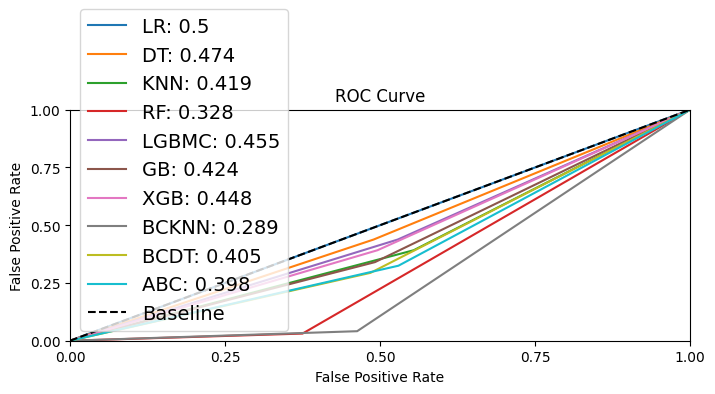

In [52]:
fig, ax = plt.subplots(figsize=(8, 3))

for index, key in enumerate(comparison_dict.keys()):
    auc, fpr, tpr = comparison_dict[key][3], comparison_dict[key][4], comparison_dict[key][5]
    ax.plot(fpr,
            tpr,
            label='{}: {}'.format(key, np.round(auc, 3)))

ax.plot([0, 1], [0, 1], 'k--', label='Baseline')

ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_ylabel('False Positive Rate')
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax.autoscale(axis='both', tight=True)
ax.legend(fontsize=14);